In [12]:
# import requiered libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Hide warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#
train = pd.read_csv( '../data/raw/train.csv' , index_col = 0 )
train.head()

# Read the 'all_train.csv' file, to get a table with the parsed/processed data
all_train = pd.read_csv( '../data/interim/all_train.csv' ,  parse_dates = [0] ,  index_col = 0 )
time_res = all_train[['p_num','initial_resolution']].drop_duplicates()
time_res_d = dict( zip( time_res.p_num , time_res.initial_resolution ) )

#Add the time resolution to the raw data
train['initial_resolution'] = train['p_num'].map( time_res_d )

# NOTE: some entries in activity are really the same category. For example 'Walk' & 'Walking'
# I will proceed to convert those cases
conv_d = {
    'Walking':'Walk',
    'Running':'Run',
    'Weights':'Strength training'

}

all_train['activity'] = all_train['activity'].replace( conv_d )

,p_num,time,bg-5:55,bg-5:50,bg-5:45,bg-5:40,bg-5:35,bg-5:30,bg-5:25,bg-5:20,...,activity-0:40,activity-0:35,activity-0:30,activity-0:25,activity-0:20,activity-0:15,activity-0:10,activity-0:05,activity-0:00,bg+1:00
id,,,,,,,,,,,,,,,,,,,,,
p01_0,p01,06:10:00,NaN,NaN,9.6,NaN,NaN,9.7,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.4
p01_1,p01,06:25:00,NaN,NaN,9.7,NaN,NaN,9.2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.8
p01_2,p01,06:40:00,NaN,NaN,9.2,NaN,NaN,8.7,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.5
p01_3,p01,06:55:00,NaN,NaN,8.7,NaN,NaN,8.4,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.8
p01_4,p01,07:10:00,NaN,NaN,8.4,NaN,NaN,8.1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.7


In [4]:
cond = (train.columns.str.startswith('activity-')) | (train.columns.str.startswith('carbs-'))
exclude_cols = train.columns[np.where(cond)[0]]

# Also exclude the 'id','p_num' & 'time'
train_s = train.drop(exclude_cols, axis=1).drop(['p_num', 'time'], axis=1)
train_s

,bg-5:55,bg-5:50,bg-5:45,bg-5:40,bg-5:35,bg-5:30,bg-5:25,bg-5:20,bg-5:15,bg-5:10,...,cals-0:40,cals-0:35,cals-0:30,cals-0:25,cals-0:20,cals-0:15,cals-0:10,cals-0:05,cals-0:00,bg+1:00
id,,,,,,,,,,,,,,,,,,,,,
p01_0,NaN,NaN,9.6,NaN,NaN,9.7,NaN,NaN,9.2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.4
p01_1,NaN,NaN,9.7,NaN,NaN,9.2,NaN,NaN,8.7,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.8
p01_2,NaN,NaN,9.2,NaN,NaN,8.7,NaN,NaN,8.4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.5
p01_3,NaN,NaN,8.7,NaN,NaN,8.4,NaN,NaN,8.1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.8
p01_4,NaN,NaN,8.4,NaN,NaN,8.1,NaN,NaN,8.3,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
p12_25294,8.8,9.1,9.2,9.4,9.8,10.2,10.4,10.3,10.1,10.0,...,6.75,6.75,6.75,6.75,6.75,6.75,6.75,6.75,6.75,11.1
p12_25295,9.1,9.2,9.4,9.8,10.2,10.4,10.3,10.1,10.0,9.8,...,6.75,6.75,6.75,6.75,6.75,6.75,6.75,6.75,6.75,10.9
p12_25296,9.2,9.4,9.8,10.2,10.4,10.3,10.1,10.0,9.8,9.5,...,6.75,6.75,6.75,6.75,6.75,6.75,6.75,6.75,6.75,10.7


In [6]:
X = train_s.drop('bg+1:00', axis=1)
y = train_s['bg+1:00']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

# Impute the columns of X_train and X_test
medians = X_train.median(axis=0)
X_train = X_train.fillna(medians)
X_test = X_test.fillna(medians)

In [7]:
X_train

,bg-5:55,bg-5:50,bg-5:45,bg-5:40,bg-5:35,bg-5:30,bg-5:25,bg-5:20,bg-5:15,bg-5:10,...,cals-0:45,cals-0:40,cals-0:35,cals-0:30,cals-0:25,cals-0:20,cals-0:15,cals-0:10,cals-0:05,cals-0:00
id,,,,,,,,,,,,,,,,,,,,,
p12_1651,8.3,7.8,7.8,8.0,8.3,8.5,8.7,8.7,8.7,8.8,...,6.17,6.18,6.18,6.18,6.18,6.18,6.17,6.18,6.18,6.18
p03_18431,4.6,4.7,4.7,4.6,4.6,4.9,5.2,5.9,6.8,8.4,...,5.60,5.72,5.60,5.72,5.60,5.60,11.46,9.88,5.94,8.31
p10_20958,4.9,5.1,5.1,5.1,5.8,5.9,5.9,5.9,5.8,5.9,...,7.41,7.41,7.29,7.05,8.20,7.17,7.29,7.17,7.98,14.92
p04_9454,7.0,7.0,7.0,7.0,7.0,7.0,6.9,6.9,6.8,6.7,...,4.55,4.55,4.55,4.55,4.55,4.55,4.55,4.55,4.55,4.55
p10_13852,7.5,7.0,6.7,6.2,5.2,4.2,3.4,3.0,3.0,3.1,...,9.74,11.74,9.74,10.92,8.57,7.97,7.74,5.85,5.97,7.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
p10_18163,10.1,10.0,9.7,9.7,9.7,10.3,10.4,10.3,10.5,10.9,...,5.85,5.85,5.85,5.85,5.85,5.85,5.85,5.85,5.85,5.85
p10_1978,6.7,6.3,6.3,6.9,6.9,6.9,6.9,6.7,6.8,6.6,...,6.17,6.18,6.18,6.18,6.18,6.18,6.17,6.18,6.18,6.18
p11_4762,6.5,6.7,6.8,6.8,6.8,6.8,6.8,6.7,6.7,6.5,...,10.47,5.95,7.86,6.07,5.95,5.95,5.95,6.07,5.95,5.95


In [35]:
data = X_train
col = 'bg'
to_keep = np.where( X_train.columns.str.startswith( col ) )[0]
to_keep 
data_s = X_train.iloc[:,to_keep]
data_s = data_s.melt()

if col not in ['bg','hr']:
    data_s['log_value'] = np.log( data_s['value'] + 1e-6 )
    scaler = StandardScaler()
    data_s['S_log_value'] = pd.Series(scaler.fit_transform(data_s['log_value'].values.reshape(-1, 1)).flatten())
else:
    

,variable,value,log_value,S_log_value
0,bg-5:55,8.3,2.116256,0.214051
1,bg-5:55,4.6,1.526057,-1.632627
2,bg-5:55,4.9,1.589235,-1.434946
3,bg-5:55,7.0,1.945910,-0.318943
4,bg-5:55,7.5,2.014903,-0.103071
...,...,...,...,...
8921947,bg-0:00,5.7,1.740466,-0.961758
8921948,bg-0:00,6.1,1.808289,-0.749548
8921949,bg-0:00,8.3,2.116256,0.214051
8921950,bg-0:00,6.3,1.840550,-0.648607


<Axes: xlabel='S_log_value', ylabel='Density'>

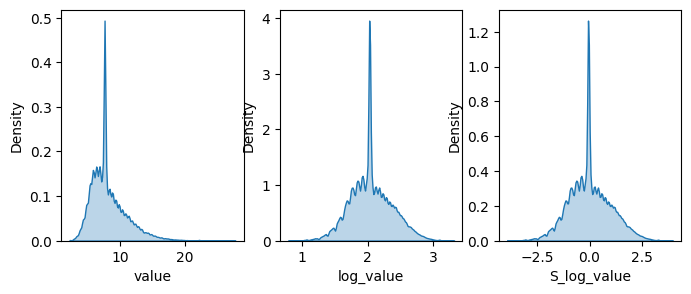

In [36]:
fig,ax = plt.subplots(1,3,figsize=(8,3))
ax  =ax.flatten()

sns.kdeplot( 
        data = data_s  , 
        x = 'value' , 
        fill = True , 
        alpha = .3 ,
        cut = 0, 
        ax = ax[0]
        )

sns.kdeplot( 
        data = data_s  , 
        x = 'log_value' , 
        fill = True , 
        alpha = .3 ,
        cut = 0, 
        ax = ax[1]
        )

sns.kdeplot( 
        data = data_s  , 
        x = 'S_log_value' , 
        fill = True , 
        alpha = .3 ,
        cut = 0, 
        ax = ax[2]
        )

NameError: name 'all_train' is not defined

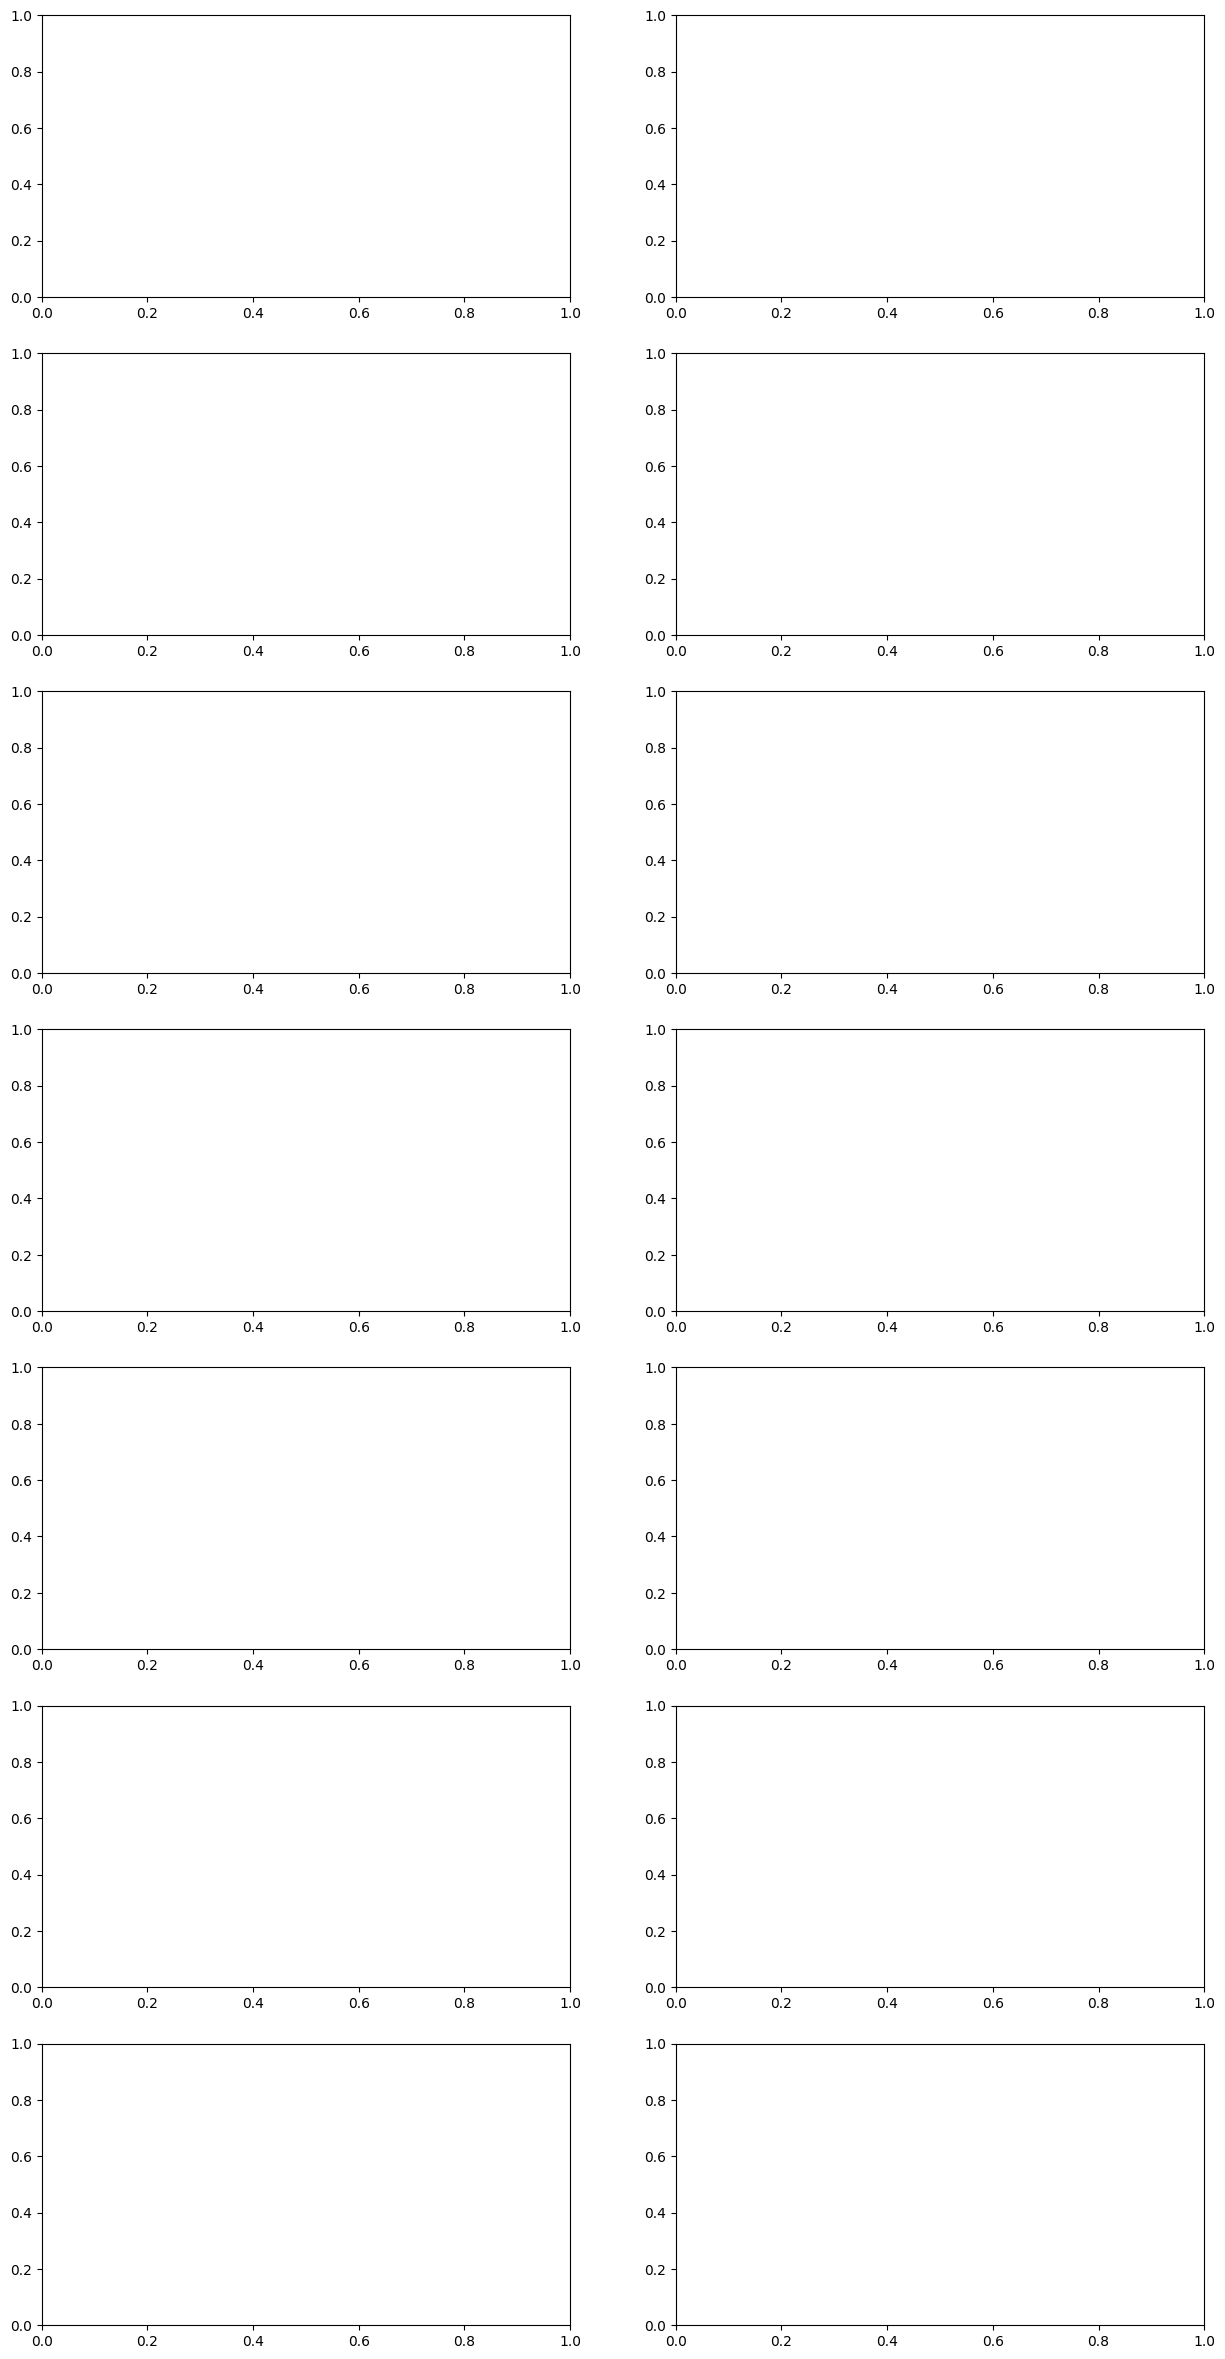

In [3]:
metrics_l = ['bg+1:00','bg','insulin','carbs','hr','steps','cals']

